## CHAPTER 5. 회귀
### 01 회귀 소개
- 회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향이 있다는 것을 이용한 통계학 기법
 - 회귀는 여러 개의 독립 변수와 한 개의 종속 변수 간의 상관관계를 모델링하는 기법을 통칭
 - 머신 러닝 관점에서 독립 변수는 Feature에 해당하면 종속 변수는 결정 값(Label). 주어진 Feature와 결정 값 데이터를 기반으로 학습을 통해 최적의 회귀 계수를 찾아냄
 - 회귀의 유형
 1. 독립 변수 개수 기준 : 단일 회귀 / 다중 회귀
 2. 회귀 계수의 결합 기준 : 선형 회귀 / 비선형 회귀
 
   
- **선형 회귀**가 가장 많이 사용됨 : 실제 값과 예측 값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
 - 규제 방법(Regularization) 방법에 따라 별도의 유형으로 나뉨
 - 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것
 1. 일반 선형 회귀 : 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화함, 규제를 적용하지 않은 모델
 2. 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델.  L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
 3. 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 모델. L2 규제는 회귀 계수 값의 크기를 줄이는 반면, L1 규제는 예측 영향력이 작은 Feature의 회귀 계수를 0으로 만들어 회귀 예측 시 해당 Feature가 선택되지 않게 해 Feature 선택 기능으로 불림
 4. 엘라스틱넷(ElasticNet) : L1, L2 규제를 함께 적용한 모델. 주로 Feature가 많은 데이터셋에 적용되며, L1 규제로 Feature의 개수를 줄이면서 L2 규제로 계수 값의 크기를 조정
 5. 로지스틱 회귀(Logistic Regression) : 분류에 사용되는 선형 모델. 일반적으로 이진 분류뿐만 아니라, 희소 영역의 분류(예 : 텍스트 분류)에서 뛰어난 예측 성능을 보임
 
### 02 단순 선형 회귀를 통한 회귀 이해
- **단순 선형 회귀** : 독립 변수가 하나, 종속 변수도 하나인 선형 회귀
 - 예를 들어 주택 가격이 주택의 크기로만 결정될 때 
 - X축이 주택의 크기이고, Y축이 주택의 가격인 2차원 평면에서 주택 가격은 변수가 주택의 크기이고, 특정 기울기와 절편을 가진 1차 함수식으로 모델링 가능
 - $w_0+w_1*X$, 절편w0과 기울기 w1가 회귀 계수
 - 실제 값은 예측 값에서 오류 값을 더한 값
- **잔차** : 실제 값과 회귀 모델의 예측 값의 차이에 따른 오류 값
 - 최적의 회귀 모델은 잔차합이 최소가 될 수 있는 최적의 회귀 계수를 찾는 것
 - 오류 값은 +나 -이기 때 문에 잔차의 합을 계산하는 방식
1. MAE(Mean Absoslute Error) : 오류 값에 절대값을 취해 더하는 방식
2. RSS(Residual Sum of Square) : 오류의 값의 제곱을 구해 더하는 방식. 일반적으로 미분 등의 계산을 편리하게 하기 위해 RSS 방식으로 오류를 구함
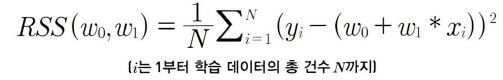

- 회귀에서 이 RSS는 비용(Cost)이며, w 변수(회귀 계수)로 구성되는 RSS 식을 비용 함수 (손실 함수, loss function)라고 함
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고, 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구함

### 03 비용 최소화하기 - 경사 하강법
- 비용 함수가 최소가 되는 w 파라미터를 구하기 위해서는 고차원 방정식을 이용하지만, w 파라미터가 너무 많으면 고차원 방정식을 동원하더라도 구하기 어려움
- 경사 하강법은 이러한 고차 방정식에 대한 문제를 해결해주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공.
 - '점진적으로' 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 최소가 되는 w 파라미터를 구하는 방식이다.
 - 반복적으로 비용 함수의 반환 값, 즉 오차가 작아지는 방향성을 가지고 w 파라미터를 계속 보정
- 비용함수 $RSS(w_0, w_1)$를 $R(w)$라고 할 때 이를 미분해서 최솟값을 구하려면 각 변수에 편미분을 적용, 편미분 결괏값을 반복적으로 보정하면서 w1, w0값 도출을 업데이트해 비용함수 R(w)가 최소가 되는 w1, w0값 도출
 - 이때 새로운 w를 이전 w에서 편미분 결괏값을 마이너스(-)하면서 적용, 보정계수(학습률)을 곱함

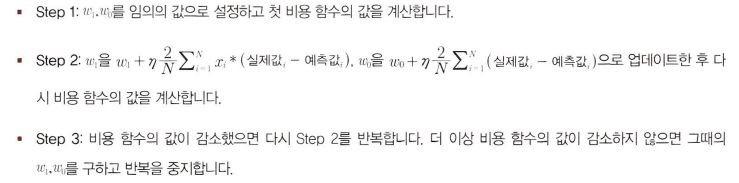

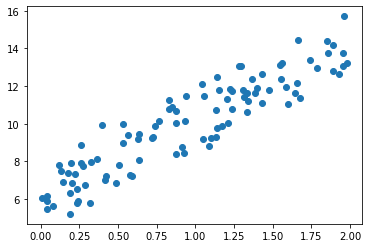

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 간단한 회귀식인 y = 4X + 6을 근사하기 위한 100개의 데이터셋 생성 
np.random.seed(0)
# y = 4X + 6 식을 근사(w1 = 4, w0 = 6). random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 +4 * X+ np.random.randn(100, 1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [4]:
# 비용 함수 정의, 실제 y값과 예측된 y값을 인자로 받아 RSS 반환
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [5]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 zero matrix로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # 행렬 내적곱
    diff = y - y_pred          
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [6]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [7]:
# gradient_descent_steps 호출해 w1, w0 구하기
# 실제값의 RSS차이를 계산하는 get_cost() 함수를 생성해 경사하강법의 예측 오류 계산
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


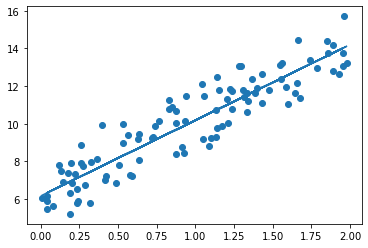

In [8]:
# y_pred 기반해 회귀선 그리기 
plt.scatter(X, y)
plt.plot(X,y_pred)

- 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수를 최소화하기 위한 w 값을 업데이트하기 때문에 수행 시간이 오래 걸림
- 실전에서는 대부분 **확률적 경사 하강법(Stochastic Gradient Descent)** 이용
 - 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라, 일부 데이터만 이용해 w가 업데이트 되는 값을 계산 -> 경사 하강법에 비해 빠른 속도를 보장

In [9]:
# (미니 배치) 확률적 경사하강법
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [12]:
# w1, w0, 예측 오류 계산 
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- (미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법의 0.9935보다 살짝 높음
 - 예측 성능 상에 큰 차이가 없으므로, 큰 데이터를 처리할 때는 경사 하강법보다는 확률적 경사 하강법을 보통 이용

- Feature가 여러 개인 경우의 회귀 계수 계산 : Feature가 1개인 경우를 확장해 유사하게 도출. M개의 피처가 있다면 회귀 계수도 M+1개로 도출.
- 예측 행렬은 np.dot(X_mat, W^T)
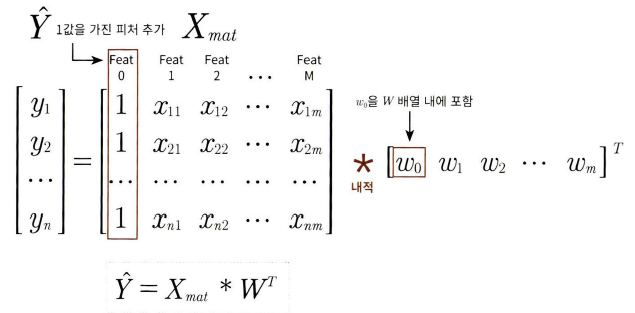

### 05 다항 회귀와 과(대)적합/과소적합 이해
#### 1) 다항 회귀 이해
- **다항(polynomial) 회귀** : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것. 선형회귀로 분류됨
- 사이킷런은 비선형 함수를 선형 모델에 적용시키는 방법을 이용해 다항회귀 구현
 - PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 Feature를 degree에 해당하는 다항식 Feature로 변환
 - PolynomialFeatures 클래스는 다른 전처리 변환 클래스와 마찬가지로, fit(), transform() 메서드로 변환 작업을 수행

In [13]:
# 단항값 [x1, x2]를 2차 다항값 [1, x1, x2, x1^2, x1x2, x2^2]로 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2 X 2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature :\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature :\n', poly_ftr)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [14]:
# 3차 다항 회귀 함수 설정, 피처값 입력시 결정 값 반환
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature : \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [15]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [16]:
# 사이킷런의 PIpeline 객체를 이용해 ㅎ나번에 다항 회귀 구현 가능
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 2) 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항 회귀는 Feature의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있지만, 다항식의 차수가 높아질수록 학습 데이터에만 너무 맞춘 학습이 이루어져 테스트 데이터에서는 예측 정확도가 떨어지는 과적합 문제 발생

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 코사인 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 target 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


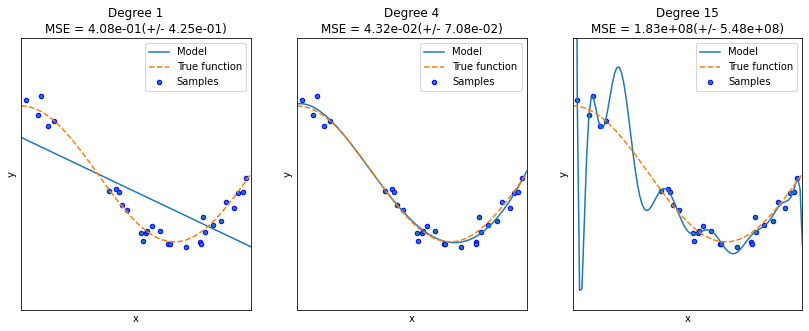

In [18]:
# 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과 비교
# 다항식 차수별로 학습 수행 후 cross_val_score()로 MSE값을 구해 예측 성능 평가
# 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 생성

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring = "neg_mean_squared_error", cv = 10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터셋을 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교 
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

1. Degree 1 예측 곡선
 1. 단순한 직선으로 단순 선형 회귀와 같음
 2. 실제 데이터셋인 코사인 데이터셋를 직선으로 예측하기에는 너무 단순함
 3. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하는 과소적합 모델
2. Degree 4 예측 곡선
 1. 실제 데이터셋과 유사
 2. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터셋을 비교적 잘 반영해, 코사인 곡선 기반으로 테스트 데이터셋을 잘 예측한 모델
3. Degree 15 예측 곡선
 1. MSE 값이 180526263.32으로 이상한 오류 값이 발생
 2. 예측 곡선을 보면 데이터셋의 변동 잡음 값을 지나치게 반영해, 예측 곡선이 학습 데이터셋만 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선 도출
 3. 과적합 모델
 
 
#### 3) 편향-분산 트레이드오프 (Bias-Variance Trade off)
- 앞의 Degree 1과 같이 매우 단순화된 모델로 지나치게 한 방향성으로 치우친 경향이 있는 경우 : 고편향성(High Bias)을 가졌다고 표현
- Degree 15와 같이 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되어 지나치게 높은 변동성을 가진 경우 : 고분산성(Hight Variance)을 가졌다고 표현
- 일반적으로 편항과 분산은 한 쪽이 높으면, 한 쪽이 낮아지는 경향이 있다. 즉, 평향이 높으면 분산은 낮아지고(과소적합), 분산이 높으면 편향이 낮아짐(과적합).
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 지점을 **골디락스**라고 하며, 편향과 분산이 서로 트레이드 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 만드는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법